# **PyTorch Osnove 1: Podešavanje, Tenzori i Priprema Podataka**

**Kurs:** KSMF1  
**Trajanje:** ~45 min  
**Preduslovi:** Osnovno poznavanje Python-a

---

## Ciljevi Sekcije

Do kraja ove sekcije, naučićete da:

- Podesite i instalirate PyTorch, i da verifikujete instalaciju
- Kreirate, razumete i manipulišete PyTorch tenzorima
- Razumete razliku između CPU i GPU izvršavanja u PyTorch-u
- Razumete zašto su PyTorch tenzori superiorni u odnosu na NumPy nizove za ML
- Pripremite podatke koristeći PyTorch Dataset i DataLoader klase
- Razumete značaj pravilnog pretprocesuiranja podataka za ML

---

# **Deo 1: PyTorch Okruženje i Tenzori**

## 1.1 Instalacija PyTorch-a

Kako bismo lokalno instalirali PyTorch, idemo zvaničnu veb stranicu https://pytorch.org -> Get Started:

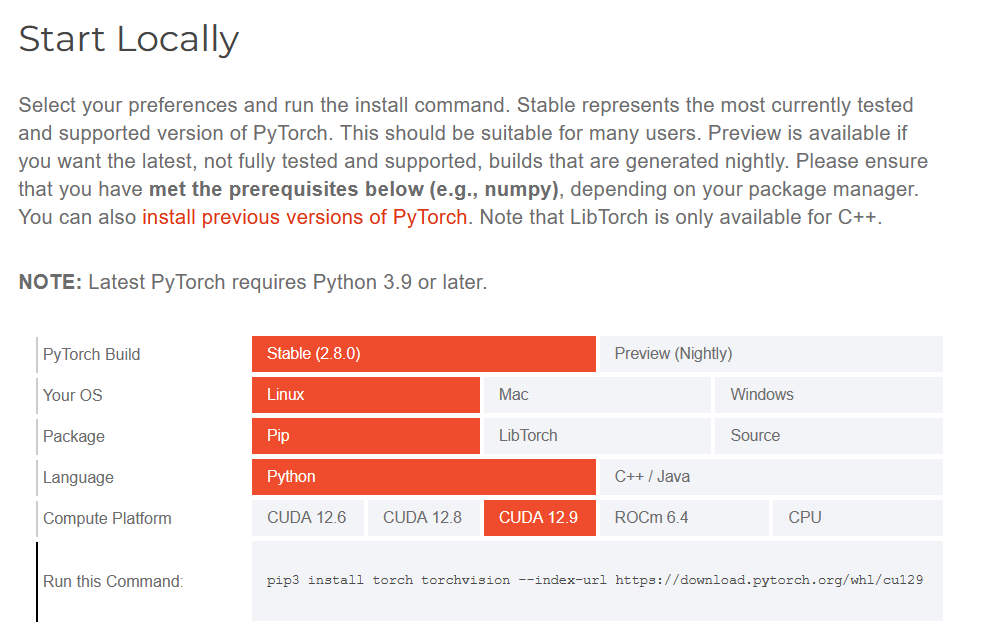

Ovde treba da odaberete parametre koji odgovaraju vašem sistemu (OS, Package, Language, and Compute Platform). Kada odaberete parametre, samo **pokrenite komandnu liniju** koju vam sajt izbaci i sve bi trebalo da bude podešeno!

VAŽNO: Compute platform predstavlja način obrade vaših podataka, tj. pomoću CPU-a ili GPU-a. Uopšteno, PyTorch najbolje radi na NVIDIA hardveru sa omogućenom CUDA platformom (*CUDA je računarska platforma za paralelno izvršavanje i programski model koji razvija NVIDIA, kako bi omogućila programerima da koriste NVIDIA GPU-ove za programiranje zadataka opšte namene*).

Da biste proverili da li je CUDA dostupna, pokrenite sledeću komandu (ako to radite lokalno, ne koristite "!" na početku):

In [ ]:
!nvidia-smi

Ako nemate GPU koji podržava CUDA platformu, videćete odgovor "command not found", pa umesto toga izaberite CPU. Ako imate GPU koji podržava CUDA platformu, videćete pregled osobina vašeg GPU-a sa CUDA verzijom u gornjem desnom uglu.

*Napomena: Za one sa AMD GPU-ovima, ROCm je AMD-ova verzija CUDA-e. Nije preporučeno da je koristite kao početnik.*

Alternativno, možete koristiti **Google Colab** (kao što ćemo koristiti za ovaj kurs). Google Colab je online Jupyter Notebook editor koji radi na Google Cloud-u i dolazi sa mnogo **predinstaliranih i podešenih** paketa (uključujući PyTorch). Takođe vam pruža i dostupne **CPU-ove i GPU-ove** za pokretanje vaših ML skripti.

CPU je uvek dostupan za korišćenje, ali da biste uključili i GPU, idete na Runtime -> Change runtime type -> Izaberite neki od dostupnih GPU-ova.

*Napomena: Google Colab pruža pristup i TPU-ovima (Tensor Processing Units). Ovo su još specijalizovaniji tipovi hardvera. Ograničićemo se na GPU-ove za svrhe ovog kursa.*

Počnimo sa import-ovanjem PyTorch-a i proverom naše instalacije:

In [ ]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

# Proveri PyTorch verziju
print(f"PyTorch version: {torch.__version__}")

# Proveri da li je CUDA (GPU podrška) dostupna
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Available GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.get_device_name()}")
else:
    print("Running on CPU only")

**Šta se upravo dogodilo?** Uvezli smo PyTorch i proverili našu instalaciju. Zapamtite, CUDA je NVIDIA-ina paralelna računarska platforma koja nam omogućava da koristimo GPU-ove za brže izračunavanje. GPU-ovi se u PyTorch-u nazivaju CUDA uređaji (možete imati više od 1 GPU-a).

---

## 1.2 Uvod u PyTorch Tenzore

### Šta je tenzor?

Za potrebe ML-a, **tenzor** je generalizacija vektora i matrica na potencijalno veće dimenzije.

Posmatrajte tenzore kao:
- 0D tenzor = skalar (jedan broj)
- 1D tenzor = vektor (niz brojeva)
- 2D tenzor = matrica (tabela brojeva)
- 3D tenzor = kocka brojeva
- nD tenzor = n-dimenzionalni niz

U fizici, susretali smo tenzore u kontekstima kao što su tenzori napona, tenzori elektromagnetnog polja ili metrički tenzor u opštoj teoriji relativnosti, sa mnogo strožom matematičkom definicijom promena koordinata.

Ovde samo treba da razmišljamo o njima kao o n-dimenzionalnim nizovima.

### Kreirenje PyTorch Tenzora

In [ ]:
# Različiti načini kreiranja tenzora
print("=== Creating Tensors ===")

# Iz Python Listi
tensor_1d = torch.tensor([1, 2, 3, 4, 5])
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"1D tensor: {tensor_1d}")
print(f"2D tensor:\n{tensor_2d}")

# Korišćenjem postojećih funkcija
zeros = torch.zeros(3, 4)  # 3x4 tenzor ispunjen nulama
ones = torch.ones(2, 3)    # 2x3 tenzor ispunjen jedinicama
random = torch.randn(2, 3) # 2x3 tenzor sa random vrednostima iz normalne distribucije

print(f"\nZeros tensor (3x4):\n{zeros}")
print(f"\nOnes tensor (2x3):\n{ones}")
print(f"\nRandom tensor (2x3):\n{random}")

### Osobine Tenzora

Hajde da bacimo pogled na neke od osobina PyTorch tenzora:

In [ ]:
x = torch.randn(3, 4, 5)  # 3D tenzor: 3×4×5

print(f"Tensor shape: {x.shape}")
print(f"Tensor size: {x.size()}")  # Isto što i shape
print(f"Number of dimensions: {x.dim()}")
print(f"Total number of elements: {x.numel()}")
print(f"Data type: {x.dtype}")
print(f"Device: {x.device}")

### Tipovi Podataka u Tenzorima

In [ ]:
# Različiti tipovi podataka
print("=== Tensor Data Types ===")

# Celobrojni tipovi
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int32)
print(f"Integer tensor: {int_tensor}, dtype: {int_tensor.dtype}")

# Float tipovi (najčešći u ML)
float_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
print(f"Float tensor: {float_tensor}, dtype: {float_tensor.dtype}")

# Boolean
bool_tensor = torch.tensor([True, False, True])
print(f"Boolean tensor: {bool_tensor}, dtype: {bool_tensor.dtype}")

# Konvertovanje između tipova
converted = int_tensor.float()  # Konvertuj u float
print(f"Converted to float: {converted}, dtype: {converted.dtype}")

## 1.3 PyTorch tenzori vs NumPy nizovi vs Python liste
Iako su svi n-dimenzionalni nizovi, postoje ključne funkcionalne razlike između ovih tipova podataka:
*   ****Python liste**** su opšte namene, mogu mešati tipove, i oslanjaju se na **spore Python petlje**.
*   ****NumPy nizovi**** su homogeni, n-dimenzionalni, **CPU-optimizovani blokovi sa brzim vektorizovanim operacijama** i broadcasting-om.
*   ****PyTorch tenzori**** su NumPy-slični nizovi koji **mogu postojati na GPU-ovima i podržavaju automatsko diferenciranje (autograd)** za duboko učenje, sa lakom NumPy interoperabilnošću.

### Sličnosti i Razlike

In [ ]:
# Kreiranje sličnih struktura podataka
numpy_array = np.array([1, 2, 3, 4, 5])
torch_tensor = torch.tensor([6, 7, 8, 9, 10])

print("=== NumPy vs PyTorch ===")
print(f"NumPy array: {numpy_array}, type: {type(numpy_array)}")
print(f"PyTorch tensor: {torch_tensor}, type: {type(torch_tensor)}")

# Konvertovanje jednih u druge
numpy_from_torch = torch_tensor.numpy()
torch_from_numpy = torch.from_numpy(numpy_array)

print(f"Tensor to NumPy: {numpy_from_torch}, type: {type(numpy_from_torch)}")
print(f"NumPy to Tensor: {torch_from_numpy}, type: {type(torch_from_numpy)}")

### Ključna Razlika: Automatska Diferencijacija (Autograd)

Ovo je stvar koja PyTorch tenzore čini superiornim za mašinsko učenje!

In [ ]:
# Kreiraj tenzor koji zahteva računanje gradijenata
x = torch.tensor([2.0], requires_grad=True)
print(f"x = {x}")

# Definiši neku operaciju
y = x**2 + 3*x + 1
print(f"y = x² + 3x + 1 = {y}")

# Izračunaj gradijente (izvode) automatski!
y.backward()  # Ovo računa dy/dx
print(f"Gradient dy/dx = {x.grad}")

# Analitički izvod od y = x² + 3x + 1 je dy/dx = 2x + 3
# Na x = 2: dy/dx = 2(2) + 3 = 7
print(f"Analytical gradient at x=2: {2*2 + 3}")

**Zašto je ovo važno?** Neuronske mreže uče tako što prilagođavaju svoje parametre na osnovu gradijenata. PyTorch automatski računa ove gradijente za nas, bez obzira na to koliko složen naš model postane.

Dakle, nije potrebno razmišljati o tome kako numerički izračunati izvode za svaki korak naših složenih modela. Dovoljno je pozvati **backward()** metodu na PyTorch tenzoru i svi izvodi će se biti izračunati!

---

## 1.4 Operacije na Tenzorima

PyTorch tenzori podržavaju matematičke operacije koje su **vektorizovane** (primenjene na sve elemente istovremeno), što ih čini mnogo bržim od nativnih Python petlji koje manipulišu elementima sekvencijalno.

### Osnovne Operacije

In [ ]:
# Osnovne operacije
a = torch.tensor([1, 2, 3, 4])
b = torch.tensor([2, 3, 4, 5])

print("=== Basic Tensor Operations ===")
print(f"a = {a}")
print(f"b = {b}")
print(f"Addition: a + b = {a + b}")
print(f"Subtraction: a - b = {a - b}")
print(f"Multiplication: a * b = {a * b}")  # Element-prema-Elementu (Element-wise)
print(f"Division: a / b = {a / b}")

# Matematičke funkcije
print(f"\nSquare root of a: {torch.sqrt(a.float())}")
print(f"Sine of a: {torch.sin(a.float())}")
print(f"Exponential of a: {torch.exp(a.float())}")

### Matrične Operacije

In [ ]:
# Matrične operacije (važne za neuronske mreže!)
A = torch.randn(3, 4)  # 3×4 matrica
B = torch.randn(4, 2)  # 4×2 matrica
print("=== Matrix Operations ===")
print(f"Matrix A (3×4):\n{A}")
print(f"Matrix B (4×2):\n{B}")

# Matično množenje
C = torch.matmul(A, B)  # ili A @ B
print(f"Matrix multiplication A @ B (3×2):\n{C}")

# Transponovanje
print(f"Transpose of A:\n{A.T}")

### Operacije Oblikovanja

#### Osnovno Oblikovanje

In [ ]:
print("=== Basic Tensor Shaping ===")
# Kreiraj 1D tenzor sa 12 elemenata
x = torch.arange(12)
print(f"Original tensor: {x}")
print(f"Shape: {x.shape}")

# Promeni oblik u različite dimenzije
x_2d = x.reshape(3, 4)  # 3 reda, 4 kolone
print(f"Reshaped to 3×4:\n{x_2d}")
x_3d = x.reshape(2, 2, 3)  # 2 sloja (dubina), 2 reda, 3 kolone
print(f"Reshaped to 2×2×3:\n{x_3d}")

# View je sličan reshape-u ali deli memoriju
x_view = x.view(4, 3)
print(f"View as 4×3:\n{x_view}")

#### Dodavanje i Uklanjanje Dimenzija

In [ ]:
print("\n=== Adding and Removing Dimensions ===")
# Počni sa 2D tenzorom
tensor_2d = torch.randn(3, 4)
print(f"Original 2D tensor shape: {tensor_2d.shape}")

# Dodaj dimenzije sa unsqueeze
tensor_3d = tensor_2d.unsqueeze(0)  # Dodaj dimenziju na indeksu 0
print(f"After unsqueeze(0): {tensor_3d.shape}")  # Sada (1, 3, 4)

tensor_4d = tensor_3d.unsqueeze(-1)  # Dodaj dimenziju na kraju
print(f"After unsqueeze(-1): {tensor_4d.shape}")  # Sada (1, 3, 4, 1)

# Ukloni dimenzije sa squeeze
back_to_2d = tensor_4d.squeeze()  # Ukloni sve dimenzije veličine 1
print(f"After squeeze(): {back_to_2d.shape}")  # Nazad na (3, 4)

#### Broadcasting

In [ ]:
print("\n=== Broadcasting Basics ===")
# Broadcasting omogućava operacije između tenzora različitih oblika
a = torch.randn(3, 4)
b = torch.randn(4)  # Ovo će biti broadcast-ovano da odgovara 'a'
print(f"Tensor a shape: {a.shape}")
print(f"Tensor b shape: {b.shape}")

# Sabiranje sa broadcasting-om
result = a + b  # b se broadcast-uje na (3, 4)
print(f"a + b result shape: {result.shape}")
print("Broadcasting: b is automatically expanded to match a's shape!")

print("\n=== More Broadcasting Examples ===")
# Skalarni broadcasting
scalar = 5
tensor = torch.randn(2, 3)
result_scalar = tensor * scalar  # Skalar se broadcast-uje na sve elemente
print(f"Tensor * scalar: {tensor.shape} * scalar -> {result_scalar.shape}")

# Broadcasting različitih dimenzija
x = torch.randn(3, 1)  # Kolona vektor
y = torch.randn(1, 4)  # Red vektor
z = x + y  # Rezultuje u (3, 4) matricu
print(f"Column vector {x.shape} + row vector {y.shape} = {z.shape}")

#### Flatten i Unflatten

In [ ]:
print("\n=== Flatten and Unflatten ===")
# Korisno za konvertovanje između konvolucijskih i linearnih slojeva
conv_output = torch.randn(2, 64, 8, 8)  # Batch, Kanali, Visina, Širina
print(f"Conv layer output shape: {conv_output.shape}")

# Spljošti (squeeze) za linearni sloj (zadrži batch dimenziju)
flattened = conv_output.flatten(start_dim=1)  # Spljošti od dimenzije 1 nadalje
print(f"Flattened shape: {flattened.shape}")  # (2, 64*8*8)

# Možete takođe koristiti reshape
flattened_v2 = conv_output.reshape(conv_output.size(0), -1)  # -1 znači "izračunaj"
print(f"Reshape version: {flattened_v2.shape}")

#### Permutovanje

In [ ]:
print("\n=== Permute: Preuređivanje dimenzija ===")
# Korisno za menjanje formata podataka (npr., kanali prvi/poslednji)
image_tensor = torch.randn(3, 224, 224)  # Kanali, Visina, Širina
print(f"Original image shape (CHW): {image_tensor.shape}")

# Konvertuj u format Visina, Širina, Kanali
image_hwc = image_tensor.permute(1, 2, 0)
print(f"Permuted to HWC: {image_hwc.shape}")

# Primer sa batch-om slika
batch_images = torch.randn(32, 3, 224, 224)  # Batch, Kanali, Visina, Širina
batch_hwc = batch_images.permute(0, 2, 3, 1)  # Batch, Visina, Širina, Kanali
print(f"Batch CHW {batch_images.shape} -> Batch HWC {batch_hwc.shape}")

---

## 1.5 CPU vs GPU: Razlika u brzini

### Razumevanje Uređaja (Devices)
U PyTorch-u, `device` se odnosi na to gde je vaš tenzor uskladišten i gde se izvršavaju izračuni. Dva glavna tipa su:
*   CPU: Procesor vašeg računara - sporiji ali uvek dostupan
*   GPU: Grafička karta - mnogo brža za paralelno izračunavanje

CPU (Central Processing Units - Centralne Procesorske Jedinice) su univerzalni procesori koji mogu da izvršavaju različite i jednostavne i složene operacije. Oni su "mozak" vaših računara.

GPU (Graphics Processing Units - Grafičke Procesorske Jedinice), s druge strane, mogu da izvršavaju samo jednostavne operacije, ali rade velik broj njih paralelno i to veoma brzo, što ih čini mnogo bržim i efikasnijim za velike tenzorske operacije. Posmatrajte ih kao procesore specijalizovane za tenzorske operacije.

*Napomena: postoje različite vrste specijalizovanih procesora, ali oni se koriste u veoma specifičnim situacijama i nisu lako dostupni. Na primer, TPU, NPU, DPU, LPU, FPGA, itd.*

Programiranje za GPU-ove je generalno složenije i drugačije po paradigmi od uobičajenog CPU programiranja. Ali, upravo tu je velika prednost PyTorch-a:

Ispod haube, PyTorch ima implementiranu svu potrebnu infrastrukturu za rukovanje GPU procesuiranjem, čineći ga izuzetno lakim za procesuiranje vaših podataka na GPU-ovima. Međutim, to funkcioniše samo na NVIDIA hardveru koji ima CUDA sposobnosti.

In [ ]:
# Proveri da li je CUDA (GPU) dostupna
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())

if torch.cuda.is_available():
    print("Current CUDA device:", torch.cuda.current_device())
    print("CUDA device name:", torch.cuda.get_device_name(0))

### Definisanje Uređaja

Najbolja praksa je definisati dostupne uređaje kao varijable za brže prebacivanje s jednog na drugi.

In [ ]:
# Definiši uređaje kao varijable
cpu_device = torch.device('cpu')
gpu_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("CPU device:", cpu_device)
print("GPU device:", gpu_device)

### Kreiranje Tenzora na Različitim Uređajima

In [ ]:
# Ako nije specificirano, tenzori se kreiraju na CPU po defaultu
tensor = torch.randn(3, 3)
print("Original device:", tensor.device)

# Kreiraj tenzore direktno na specifičnim uređajima
cpu_tensor = torch.randn(3, 3, device=cpu_device)
gpu_tensor = torch.randn(3, 3, device=gpu_device)
print("CPU tensor device:", cpu_tensor.device)
print("GPU tensor device:", gpu_tensor.device)

### Pomeranje Tenzora Između Uređaja

In [ ]:
# Kreiraj tenzor na CPU
cpu_tensor = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("Originalni tenzor (CPU):")
print(f"Device: {cpu_tensor.device}")
print(f"Data: {cpu_tensor}")

# Metoda 1: Korišćenje .to() metode
gpu_tensor = cpu_tensor.to(gpu_device)
print(f"\nPrebačen na GPU korišćenjem .to():")
print(f"Device: {gpu_tensor.device}")
print(f"Data: {gpu_tensor}")

# Metoda 2: Korišćenje .cuda() i .cpu() metoda (ako je GPU dostupan)
if torch.cuda.is_available():
    gpu_tensor2 = cpu_tensor.cuda()  # Prebaci na GPU
    cpu_tensor2 = gpu_tensor2.cpu()  # Prebaci nazad na CPU
    print(f"\nKorišćenje .cuda(): {gpu_tensor2.device}")
    print(f"Korišćenje .cpu(): {cpu_tensor2.device}")

**VAŽNO: Operacije zahtevaju da tenzori budu na istom uređaju!**

In [ ]:
# Ovo će prouzrokovati grešku ako su tenzori na različitim uređajima
try:
    cpu_a = torch.tensor([1, 2, 3], device='cpu')
    gpu_b = torch.tensor([4, 5, 6], device=gpu_device)
    # Ovo će biti neuspešno ako su uređaji različiti!
    result = cpu_a + gpu_b

except RuntimeError as e:
    print("Error:", str(e))
    print("\nSolution: Move both tensors to the same device")

    # Ispravan način:
    gpu_a = cpu_a.to(gpu_device)
    result = gpu_a + gpu_b
    print("Success! Result device:", result.device)

### Poređenje Perfonrmansi

Hajde da uporedimo performanse izvršavanja matričnog množenja na CPU i GPU:

In [ ]:
def benchmark_device_performance():
    # Kreiraj velike matrice
    size = 1000

    # CPU tenzori
    cpu_a = torch.randn(size, size, device='cpu')
    cpu_b = torch.randn(size, size, device='cpu')

    # GPU tenzori (ako su dostupni)
    if torch.cuda.is_available():
        gpu_a = cpu_a.cuda()
        gpu_b = cpu_b.cuda()

        # Zagrevanje GPU-a
        * = torch.matmul(gpu*a, gpu_b)
        torch.cuda.synchronize()

    # Performanse na CPU
    start_time = time.time()
    num_of_multiplications = 10
    for * in range(num*of_multiplications):
        cpu_result = torch.matmul(cpu_a, cpu_b)
    cpu_time = time.time() - start_time
    print(f"CPU time for {num_of_multiplications} matrix multiplications: {cpu_time:.4f} seconds")

    # Performanse na GPU (ako je dostupan)
    if torch.cuda.is_available():
        start_time = time.time()
        for * in range(num*of_multiplications):
            gpu_result = torch.matmul(gpu_a, gpu_b)
        torch.cuda.synchronize()  # Čekaj da se GPU operacije završe
        gpu_time = time.time() - start_time
        print(f"GPU time for {num_of_multiplications} matrix multiplications: {gpu_time:.4f} seconds")
        print(f"GPU speedup: {cpu_time/gpu_time:.2f}x faster")
    else:
        print("GPU not available for comparison")

# Pokreni benchmark
benchmark_device_performance()

### Korišćenje Memorije

In [ ]:
def check_memory_usage():
    if torch.cuda.is_available():
        # Očisti GPU keš memoriju
        torch.cuda.empty_cache()

        # Proveri početnu GPU memoriju
        print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1e6:.1f} MB")
        print(f"GPU memory cached: {torch.cuda.memory_reserved() / 1e6:.1f} MB")

        # Kreiraj veliki tenzor na GPU
        large_tensor = torch.randn(1000, 1000, device='cuda')
        print(f"\nAfter creating large tensor:")
        print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1e6:.1f} MB")
        print(f"GPU memory cached: {torch.cuda.memory_reserved() / 1e6:.1f} MB")

        # Obriši tenzor i očisti keš
        del large_tensor
        torch.cuda.empty_cache()
        print(f"\nAfter cleanup:")
        print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1e6:.1f} MB")
        print(f"GPU memory cached: {torch.cuda.memory_reserved() / 1e6:.1f} MB")
    else:
        print("GPU not available for memory usage demonstration")

check_memory_usage()

---

# **Deo 2: Priprema Podataka u PyTorch-u**

## 2.1 Zašto je priprema podataka važna

U mašinskom učenju, priprema podataka je često 80% posla. Dobra priprema podataka uglavnom pravi razliku između modela koji radi i onog koji ne radi.

Ključne napomene:
- **Konzistentnost**: Svi podaci treba da budu u istom formatu
- **Skaliranje**: Karakteristike treba da budu na sličnim skalama
- **Podela u batch-ove**: Obrađivanje podataka u grupama radi efikasnosti
- **Mešanje**: Randomizovanje redosleda podataka da se izbegne pristranost
---

## 2.2 Primeri ML Podataka

### Tabelarni Podaci

In [ ]:
# Primer: Dataset ocena učenika iz fizike
# Karakteristike: study_hours, previous_grade, attendance
# Cilj: final_exam_score

student_data = torch.tensor([
    [10, 85, 95],  # 10 sati učenja, 85% prethodna ocena, 95% prisustvo
    [5,  78, 80],
    [15, 92, 100],
    [8,  65, 75],
    [12, 88, 90]
], dtype=torch.float32)

exam_scores = torch.tensor([88, 75, 95, 70, 85], dtype=torch.float32)

print("Student data (study_hours, previous_grade, attendance):")
print(student_data)
print(f"Exam scores: {exam_scores}")

### Slike kao Podaci

In [ ]:
# Slike se tipično predstavljaju kao tenzori sa oblikom (Kanali, Visina, Širina)
# Za RGB slike: 3 kanala (Crvena, Zelena, Plava)

# Simuliraj malu RGB sliku (3x32x32)
image_tensor = torch.randn(3, 32, 32)
print(f"Image tensor shape: {image_tensor.shape}")
print(f"Channels (RGB): {image_tensor.shape[0]}")
print(f"Height: {image_tensor.shape[1]}")
print(f"Width: {image_tensor.shape[2]}")

# Za batch obradu, dodajemo batch dimenziju: (Batch, Kanali, Visina, Širina)
batch_of_images = torch.randn(16, 3, 32, 32)  # 16 slika
print(f"Batch of images shape: {batch_of_images.shape}")

### Vremenski Nizovi kao Podaci

In [ ]:
# Primer: Merenja temperature tokom vremena
# Oblik: (sequence_length, features)

time_points = torch.arange(0, 24, 0.5)  # Svakih 30 minuta za 24 sata
temperature = 20 + 5 * torch.sin(time_points * np.pi / 12) + torch.randn(len(time_points))
time_series_data = torch.stack([time_points, temperature], dim=1)

print(f"Time series shape: {time_series_data.shape}")
print("First few time points (time, temperature):")
print(time_series_data[:5])

---

## 2.3 Priprema Podataka

### Skaliranje i normalizacija

Zamislite da pravite model za predviđanje cena kuća koristeći karakteristike kao što su:
- **Kvadratura**: 1,200 - 4,500 (raspon od ~3,300)
- **Broj spavaćih soba**: 1 - 5 (raspon od 4)
- **Cena po kvadratnom metru**: $50 - $800 (raspon od ~750)

Bez skaliranja, algoritmi kao što su **k-najbližih suseda** ili **neuronske mreže** bi bili pod velikim uticajem karakteristike sa najvećim vrednostima (kvadratura), ignorišući, u suštini, karakteristike manjeg opsega kao što su spavaće sobe. Tu na scenu stupa **skaliranje podataka**!

**Skaliranje podataka** transformiše karakteristike tako da su sve na sličnim skalama, obezbeđujući da svaka karakteristika ravnopravno doprinosi odlukama vašeg modela.

Česti metodi skaliranja:
1. **Standardno skaliranje** - Transformiše podatke da imaju **srednju vrednost = 0** i **standardnu devijaciju = 1**
2. **Min-Max skaliranje** - Transformiše podatke u **fiksiran raspon**, tipično [0, 1]
3. **Robusno skaliranje** - Koristi **medijanu i interkvartilni raspon** - manje osetljivo na outliere

| Metod | Najbolji za | Prednosti | Mane |
|--------|----------|------|------|
| **Standardno skaliranje** | Neuronske mreže, SVM, PCA | Čuva distribuciju podataka | Osetljivo na izuzetke |
| **Min-Max skaliranje** | Kada želite ograničene vrednosti | Čuva tačna rastojanja | Veoma osetljivo na izuzetke  |
| **Robusno skaliranje** | Podaci sa mnogo izuzetaka | Otporan na izuzetke | Može izgubiti neke informacije |

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Kreiraj uzorak podataka sa dve karakteristike veoma različitih skala
np.random.seed(42)
n_points = 100
age = np.random.normal(35, 8, n_points)           # Mala skala: raspon 20-50
income = np.random.normal(50000, 15000, n_points) # Velika skala: raspon 20k-80k

# Primeni standardno skaliranje
data = np.column_stack([age, income])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Kreiraj scatter plotove jedan pored drugog
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Sirovi podaci
ax1.scatter(age, income, alpha=0.6, color='blue', s=50)
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Income ($)')
ax1.set_title('Raw Data\n(Very Different Scales)', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Dodaj informacije o rasponu
ax1.text(0.05, 0.95, f'Age range: {age.min():.0f} - {age.max():.0f}\n' +
                      f'Income range: ${income.min():,.0f} - ${income.max():,.0f}',
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# Plot 2: Skalirani podaci
ax2.scatter(scaled_data[:, 0], scaled_data[:, 1], alpha=0.6, color='green', s=50)
ax2.set_xlabel('Age (standardized)')
ax2.set_ylabel('Income (standardized)')
ax2.set_title('After Standard Scaling\n(Same Scale)', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Dodaj informacije o skaliranju
ax2.text(0.05, 0.95, 'Both features now:\n• Mean ≈ 0\n• Std ≈ 1\n• Equal importance!',
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

print("Raw data stats:")
print(f"Age: mean={age.mean():.1f}, std={age.std():.1f}")
print(f"Income: mean=${income.mean():,.0f}, std=${income.std():,.0f}")

print("\nScaled data stats:")
print(f"Age: mean={scaled_data[:, 0].mean():.3f}, std={scaled_data[:, 0].std():.3f}")
print(f"Income: mean={scaled_data[:, 1].mean():.3f}, std={scaled_data[:, 1].std():.3f}")

### Podela u Batch-ove

Zamislite da trenirate neuronsku mrežu da prepoznaje mačke i pse koristeći 100,000 slika. Imate dve opcije:

Ubacite svih 100,000 slika odjednom → Vaš računar ostane bez memorije i prekine program. Ili, ubacite slike u malim grupama (batch-ovima) → Treniranje postaje stohastičko, ali daleko brže i efikasnije.

Podela u batch-ove znači obrađivanje vaših podataka u manjim grupama umesto svih odjednom.

U zavisnosti od veličine batch-ova, postoje tri tipa gradijentnog spusta:
1. **Batch gradijentni spust (pun batch)** - Koristi **ceo dataset** za svako ažuriranje
    - Prednosti: Stabilan, egzaktan, glatko konvergira u minimum
    - Mane: Spor, zahteva mnogo memorije
2. **Stohastički gradijentni spust (SGD)** - Koristi po **jedan uzorak** za svako ažuriranje
    - Prednosti: Brza ažuriranja, izbegava lokalne minimume, efikasan sa memorijom
    - Mane: Veoma stohastičan, nestabilan, teško paralelizovati, konvergira ka oblasti gde je minimum
3. **Mini-batch gradijentni spust (zlatna sredina!)** - Koristi **male batch-ove** podataka
    - Prednosti: Uravnotežena brzina i stabilnost, lako se implementira na GPU, bolja konvergencija od SDG-a
    - Mane: Još jedan hiperparametar za podešavanje

Brze smernice za veličinu batch-a:
| Veličina batch-a | Memorija | Brzina | Stabilnost | Najbolji za |
|------------|--------|-------|-----------|----------|
| **1-16** | Niska | Srednja | Niska (šum) | Mali datasetovi, eksperimentisanje |
| **32-64** | Srednja | Dobra | Dobra | **Najčešći izbor!** |
| **128-256** | Visoka | Brza | Visoka | Veliki datasetovi, moćni GPU-ovi |
| **512+** | Vrlo visoka | Vrlo brza | Vrlo visoka | Masivni datasetovi, istraživanje |

### Mešanje (Shuffling)

Zamislite da vaš dataset izgleda ovako: **prvo idu sve mačke, zatim svi psi**. Ako trenirate svoj model bez mešanja, videće 1000 slika mačaka, naučiti "da je sve mačka," zatim odjednom videti 1000 slika pasa i zbuniti se!

**Mešanje** randomizuje redosled podataka za treniranje tako da model vidi dobru mešavinu primera tokom treniranja, sprečavajući ga da nauči pristrasne obrasce zasnovane na redosledu podataka.

Tipovi mešanja:
1. **Mešanje po epohi (najčešće)** - Mešanje jednom na početku svake epohe
2. **Globalno mešanje (jednokratno)** - Mešanje jednom pre početka treniranja
3. **Buffer mešanje (napredno)** - Koristi se za vrlo velike datasetove koji ne staju u memoriju

Kratko uputstvo:
| Scenario | Mešanje? | Zašto |
|----------|----------|-----|
| **Klasifikacija slika** | ✅ DA | Sprečava učenje redosleda klasa |
| **Klasifikacija teksta** | ✅ DA | Obezbeđuje balansiranje batch-ova |
| **Predviđanje vremenskih serija** | ❌ NE | Vremenski redosled je ključan |
| **Podaci za treniranje** | ✅ DA | Poboljšava generalizaciju |
| **Podaci za validaciju** | ❌ NE | Drži konzistentnost za poređenje |
| **Test podaci** | ❌ NE | Potrebni su reproducibilni rezultati |
| **Vrlo veliki datasetovi** | ✅ DA | Koristi buffer ili indeks mešanje |

---

## 2.4 PyTorch `Dataset` Klasa

`Dataset` klasa je PyTorch-ov način organizovanja podataka. Zamislite je kao pakovanje koje zna kako da:
1. Vam kaže koliko uzoraka ima
2. Vam izvuče specifičan uzorak kada ga zatražite

In [ ]:
from torch.utils.data import Dataset

class PhysicsStudentDataset(Dataset):
    """Prilagođeni dataset za podatke učenika fizike."""

    def __init__(self, features, targets):
        """
        Args:
            features: tenzor oblika (n_samples, n_features)
            targets: tenzor oblika (n_samples,)
        """
        self.features = features
        self.targets = targets

    def __len__(self):
        """Metoda koja vraća broj uzoraka u dataset-u."""
        return len(self.features)

    def __getitem__(self, idx):
        """Metoda koja vraća jedan uzorak (karakteristika, oznaka) datog indeksa."""
        return self.features[idx], self.targets[idx]

# Kreiraj naš prilagođeni dataset
dataset = PhysicsStudentDataset(student_data, exam_scores)

print(f"Dataset length: {len(dataset)}")
print(f"First sample: {dataset[0]}")
print(f"Third sample: {dataset[2]}")

# Možemo takođe koristiti indeksiranje
features, target = dataset[1]
print(f"Second student features: {features}")
print(f"Second student exam score: {target}")

### Zašto Koristiti `Dataset` Klasu

In [ ]:
def get_sample_manual(data, targets, idx):
    return data[idx], targets[idx]

# Sa Dataset klasom
sample_manual = get_sample_manual(student_data, exam_scores, 0)
sample_dataset = dataset[0]

print("Manual approach:", sample_manual)
print("Dataset approach:", sample_dataset)
print("Results are the same, but Dataset provides structure and consistency!")

---

## 2.5 PyTorch `DataLoader` Klasa

`DataLoader` "obavija" `Dataset` klasu (wrapper) i pruža:
- **Podelu u batch-ove**: Grupiše uzorke u batch-ove
- **Mešanje**: Randomizuje redosled uzoraka
- **Paralelno učitavanje**: Može učitavati podatke koristeći više procesa

In [ ]:
from torch.utils.data import DataLoader

# Kreiraj DataLoader
dataloader = DataLoader(
    dataset=dataset,
    batch_size=2,        # Obrađuj 2 uzorka u isto vreme
    shuffle=True,        # Randomiziraj redosled
    num_workers=0        # Broj procesa za učitavanje (0 = jedan proces)
)

print("=== DataLoader Demonstration ===")
print(f"Dataset size: {len(dataset)}")
print(f"Batch size: {dataloader.batch_size}")
print(f"Number of batches: {len(dataloader)}")

### Iteracija Kroz Batch-ove

In [ ]:
# Iteriraj kroz sve indekse
for batch_idx, (features_batch, targets_batch) in enumerate(dataloader):
    print(f"\nBatch {batch_idx + 1}:")
    print(f"Features shape: {features_batch.shape}")
    print(f"Targets shape: {targets_batch.shape}")
    print(f"Features:\n{features_batch}")
    print(f"Targets: {targets_batch}")

### Vizuelizacija Grupisanja u Batch-ove

In [ ]:
# Hajde da napravimo veći dataset kako bismo bolje razumeli batching
large_features = torch.randn(10, 3)  # 10 samples, 3 features each
large_targets = torch.randn(10)      # 10 targets

large_dataset = PhysicsStudentDataset(large_features, large_targets)
large_dataloader = DataLoader(large_dataset, batch_size=3, shuffle=False)

print("=== Batching Demonstration ===")
print(f"Original dataset size: {len(large_dataset)}")

for i, (features_batch, targets_batch) in enumerate(large_dataloader):
    print(f"Batch {i}: {features_batch.shape[0]} samples")

print("\nNote: Last batch might be smaller if dataset size is not divisible by batch size!")

---

## 2.6 Primer Pretprocesuiranja Podataka

Hajde da vidimo sve što smo naučili o pripremi podataka na konkretnom primeru:

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Simuliraj eksperimentalne fizičke podatke
torch.manual_seed(42)  # Za reproducibilne rezultate

# Generiši sintetičke podatke: merenja energije čestica vs očitavanja detektora
n_samples = 100
detector_reading_1 = torch.randn(n_samples) * 10 + 50  # Srednja vrednost 50, std 10
detector_reading_2 = torch.randn(n_samples) * 5 + 25   # Srednja vrednost 25, std 5
true_energy = 2.5 * detector_reading_1 + 1.8 * detector_reading_2 + torch.randn(n_samples) * 3

# Kombinuj karakteristike
features = torch.stack([detector_reading_1, detector_reading_2], dim=1)
print(f"Features shape: {features.shape}")
print(f"Feature statistics:")
print(f"  Detector 1 - mean: {features[:, 0].mean():.2f}, std: {features[:, 0].std():.2f}")
print(f"  Detector 2 - mean: {features[:, 1].mean():.2f}, std: {features[:, 1].std():.2f}")

# Normalizuj karakteristike (važno za neuronske mreže!)
features_normalized = (features - features.mean(dim=0)) / features.std(dim=0)
print(f"\nNormalized features statistics:")
print(f"  Detector 1 - mean: {features_normalized[:, 0].mean():.2f}, std: {features_normalized[:, 0].std():.2f}")
print(f"  Detector 2 - mean: {features_normalized[:, 1].mean():.2f}, std: {features_normalized[:, 1].std():.2f}")

# Definiši Dataset podklasu
class ParticlesDataset(Dataset):
    """Prilagođeni dataset za podatke učenika fizike."""

    def __init__(self, features, targets):
        """
        Args:
            features: tenzor oblika (n_samples, n_features)
            targets: tenzor oblika (n_samples,)
        """
        self.features = features
        self.targets = targets

    def __len__(self):
        """Metoda koja vraća broj uzoraka u dataset-u."""
        return len(self.features)

    def __getitem__(self, idx):
        """Metoda koja vraća jedan uzorak (karakteristika, oznaka) datog indeksa."""
        return self.features[idx], self.targets[idx]

# Kreiraj dataset i dataloader
physics_dataset = ParticlesDataset(features_normalized, true_energy)
physics_dataloader = DataLoader(physics_dataset, batch_size=16, shuffle=True)

print(f"\nDataset created with {len(physics_dataset)} samples")
print(f"DataLoader will provide batches of size {physics_dataloader.batch_size}")

# Prikaži jedan batch
features_batch, targets_batch = next(iter(physics_dataloader))
print(f"Sample batch - Features: {features_batch.shape}, Targets: {targets_batch.shape}")

---

# Ključni Zaključci

## Šta smo naučili:

1. **PyTorch tenzori**: Fundamentalna struktura podataka za ML, slična NumPy nizovima ali sa GPU podrškom i automatskim diferenciranjem
2. **CPU vs GPU**: GPU-ovi mogu dramatično da ubrzaju tenzorske operacije kroz paralelno procesuiranje
3. **Autograd**: PyTorch tenzori mogu automatski da računaju gradijente, bitno za treniranje neuronskih mreža
4. **Obrada podataka**: Uvek normalizujte svoje podatke, podelite u batch-ove, i pomešajte ako je potrebno
5. **Dataset klasa**: Organizuje vaše podatke na konzistentan i pristupačan način
6. **DataLoader klasa**: Efikasno grupiše u batch-ove, meša, i učitava vaše podatke za treniranje

## Najbolje Navike:

- Uvek proverite oblike tenzora i tipove podataka
- Normalizujte svoje podatke za bolje performanse treniranja
- Koristite odgovarajuće veličine batch-ova (tipično 16, 32, 64, ili 128)
- Mešajte svoje podatke za treniranje da biste izbegli pristranost
- Premestite tenzore na GPU kada je dostupan

## Sledeći koraci:

U Sekciji 2, istražićemo PyTorch-ov Module sistem, koji pruža gradivne blokove za kreiranje neuronskih mreža. Naučićemo kako da kreiramo slojeve, kombinujemo ih u modele, i pripremimo se za naš prvi algoritam mašinskog učenja!

---

# Samostalni Rad

Pokušajte da uradite sledeće zadatke kako biste učvrstili razumevanje o tenzorima i pripremi podataka.

## Zadaci

1. Kreirajte dva nasumična float32 torch tenzora oblika (4000, 4000), i izvršite matrično množenje, prvo na CPU, zatim na GPU. Izmerite vreme izvršavanja i izračunajte GPU ubrzanje.
2. RGB slike veličine M x N su tip podataka koji čuva RGB vektor [R,G,B] za svaki od M x N piksela. R, G, i B uzimaju celobrojne vrednosti između 0 i 255. Dakle, svaka RGB slika je tenzor oblika (3, 64, 64). Kreirajte dataset od 1000 nasumičnih RGB slika kao jedan tenzor.
3. Implementirajte prilagođenu `Dataset` podklasu za vaš dataset slika.
4. Kreirajte `DataLoader` sa različitim veličinama batch-ova i posmatrajte kako to utiče na broj batch-ova za vaš dataset.

In [ ]:
# Mesto za rešavanje Zadatka 1

In [ ]:
# Mesto za rešavanje Zadatka 2

In [ ]:
# Mesto za rešavanje Zadatka 3

In [ ]:
# Mesto za rešavanje Zadatka 4

---

## Rešenja

In [ ]:
# -------- Zadatak 1 --------
import time
import torch

# Reproducibilnost
torch.manual_seed(0)

# --- CPU računanje ---
A_cpu = torch.randn((4000, 4000), dtype=torch.float32)
B_cpu = torch.randn((4000, 4000), dtype=torch.float32)

# Zagrevanje (pomaže JIT / BLAS da izabere kernele)
* = A*cpu @ B_cpu

# Počni množenje
start = time.time()
C_cpu = A_cpu @ B_cpu
cpu_time = time.time() - start
print(f"CPU matmul time: {cpu_time}")

# --- GPU računanje (ako je dostupan) ---
if torch.cuda.is_available():
    device = torch.device("cuda:0")

    # Premesti tenzore na GPU
    A_gpu = A_cpu.to(device)
    B_gpu = B_cpu.to(device)

    # Zagrevanje (i osiguraj da je cuBLAS inicijalizovan)
    torch.cuda.synchronize()
    * = A*gpu @ B_gpu
    torch.cuda.synchronize()

    # Počni množenje
    start = time.time()
    C_gpu = A_gpu @ B_gpu
    torch.cuda.synchronize()  # osiguraj da je matmul završen pre merenja vremena
    gpu_time = time.time() - start
    print(f"GPU matmul time: {gpu_time}")

speed_up = cpu_time/gpu_time
print(f"GPU speed-up is: {round(speed_up, 2)}x")

In [ ]:
# -------- Zadatak 2 --------
import torch

# Parametri dataset-a
num_images = 1000
channels, height, width = 3, 64, 64

# Kreiraj dataset: nasumični brojevi [0,255], zatim konvertuj u uint8 (kao slika)
dataset = torch.randint(
    low=0, high=256,
    size=(num_images, channels, height, width),
    dtype=torch.uint8
)

print(dataset, dataset.shape, dataset.dtype)

In [ ]:
# -------- Zadatak 3 --------
import torch
from torch.utils.data import Dataset

class RGBTensorDataset(Dataset):
    """
    Minimalni prilagođeni Dataset za 4D tenzor RGB slika:
    images: Tensor[uint8] sa oblikom (N, 3, 64, 64)
    """
    def __init__(self, images: torch.Tensor):
        assert isinstance(images, torch.Tensor)  # Slike moraju biti torch.Tensor
        assert images.ndim == 4 and images.shape[1] == 3 # Oblik mora biti (N, 3, 64, 64)
        assert images.dtype == torch.uint8  # Pikseli treba da budu uint8 (0–255)
        self.images = images

    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, idx):
        img = self.images[idx]

In [ ]:
# -------- Zadatak 4 --------
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Probaj različite veličine batch-ova
batch_sizes = [1, 16, 32, 64, 128, 256, 500, 1000]
results = {}

for bs in batch_sizes:
    loader = DataLoader(dataset, batch_size=bs, shuffle=False)
    num_batches = len(loader)
    first_batch = next(iter(loader))
    results[bs] = {
        "num_batches": num_batches,
        "batch_shape": tuple(first_batch.shape)
    }

results